# Burning Ship Fractal

$z_{n+1} = (|Re(z_n)| + i|Im(z_n)|)^2 + c$ , $z_0 = 0$

## Understanding the Formula

The key difference from the Mandelbrot set is the **absolute value** operation on both components:
- Mandelbrot: $z_{n+1} = z_n^2 + c$
- Burning Ship: $z_{n+1} = (|Re(z_n)| + i|Im(z_n)|)^2 + c$

This creates a fractal that appears "flipped" and has a distinctive ship-like appearance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Set up better plotting defaults
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['figure.dpi'] = 100

## Step 1: The Core Iteration Function

Implement the iteration for a single point and track whether a point escapes to infinity.

In [ ]:
def burning_ship_iteration(c, max_iterations=100, escape_radius=2.0):
    """
    Iterate the Burning Ship formula for a single complex number c.
    
    Parameters:
    - c: complex number representing the point in the complex plane
    - max_iterations: maximum number of iterations to perform
    - escape_radius: if |z| exceeds this, we consider it escaped
    
    Returns:
    - Number of iterations before escape (or max_iterations if it doesn't escape)
    """
    z = 0 + 0j  # Start at origin: z_0 = 0
    
    for iteration in range(max_iterations):
        # Take absolute values of real and imaginary parts
        z_abs = abs(z.real) + 1j * abs(z.imag)
        
        # Square and add c
        z = z_abs**2 + c
        
        # Check if we've escaped
        if abs(z) > escape_radius:
            return iteration
    
    # Point didn't escape - it's in the set
    return max_iterations

# Test with a single point
test_point = -1.7 + 0.03j
iterations = burning_ship_iteration(test_point)
print(f"Point {test_point} took {iterations} iterations")

Point (-1.7+0.03j) took 5 iterations


## Step 2: Visualizing the Iteration Process

Let's trace the path of z for a single point to see how it behaves:

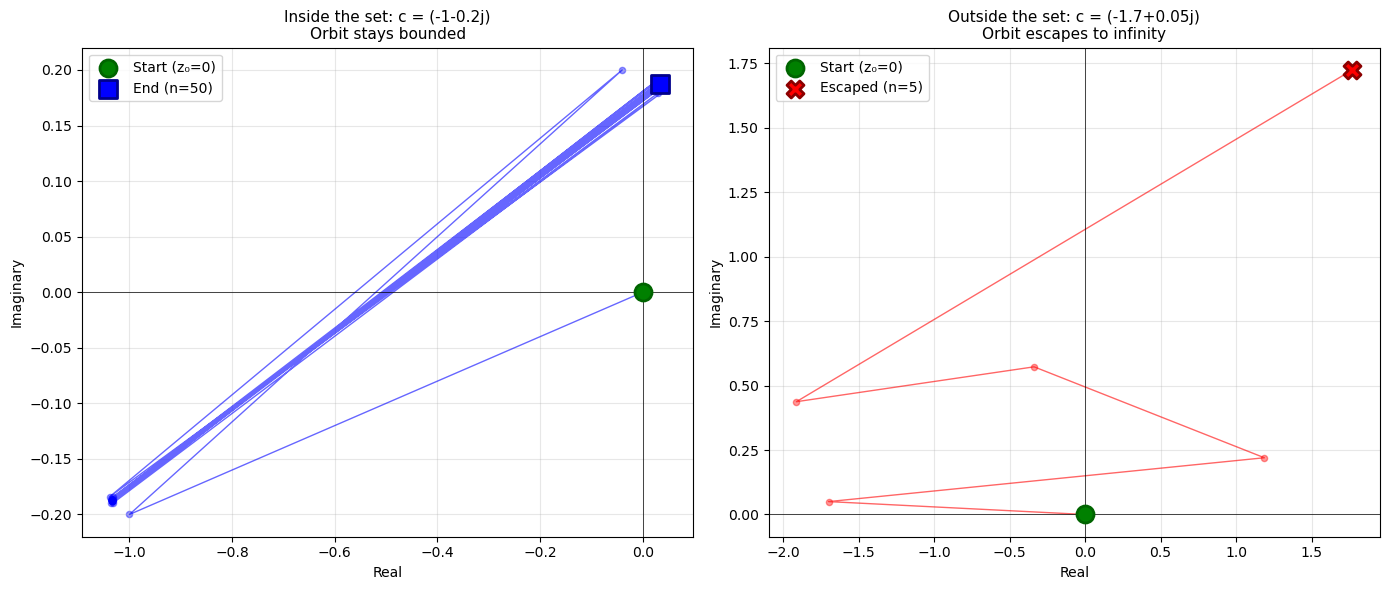

In [6]:
def trace_orbit(c, max_iterations=50):
    """
    Track the trajectory of z as it iterates.
    Returns the sequence of z values.
    """
    z = 0 + 0j
    orbit = [z]
    
    for _ in range(max_iterations):
        z_abs = abs(z.real) + 1j * abs(z.imag)
        z = z_abs**2 + c
        orbit.append(z)
        
        if abs(z) > 2.0:
            break
    
    return np.array(orbit)

# Visualize orbits for different starting points
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Point inside the set
c_inside = -1.0 - 0.2j
orbit_inside = trace_orbit(c_inside, 50)

# Plot the trajectory
ax1.plot(orbit_inside.real, orbit_inside.imag, '-', linewidth=1, alpha=0.6, color='blue')
ax1.scatter(orbit_inside.real, orbit_inside.imag, s=20, alpha=0.4, color='blue')

# Highlight start and end points
ax1.scatter(orbit_inside[0].real, orbit_inside[0].imag, s=150, color='green', 
           marker='o', edgecolors='darkgreen', linewidths=2, label='Start (z₀=0)', zorder=5)
ax1.scatter(orbit_inside[-1].real, orbit_inside[-1].imag, s=150, color='blue', 
           marker='s', edgecolors='darkblue', linewidths=2, label=f'End (n={len(orbit_inside)-1})', zorder=5)

ax1.set_title(f'Inside the set: c = {c_inside}\nOrbit stays bounded', fontsize=11)
ax1.set_xlabel('Real')
ax1.set_ylabel('Imaginary')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.legend(loc='best')

# Point outside the set
c_outside = -1.7 + 0.05j
orbit_outside = trace_orbit(c_outside, 50)

# Plot the trajectory
ax2.plot(orbit_outside.real, orbit_outside.imag, '-', linewidth=1, alpha=0.6, color='red')
ax2.scatter(orbit_outside.real, orbit_outside.imag, s=20, alpha=0.4, color='red')

# Highlight start and end points
ax2.scatter(orbit_outside[0].real, orbit_outside[0].imag, s=150, color='green', 
           marker='o', edgecolors='darkgreen', linewidths=2, label='Start (z₀=0)', zorder=5)
ax2.scatter(orbit_outside[-1].real, orbit_outside[-1].imag, s=150, color='red', 
           marker='X', edgecolors='darkred', linewidths=2, label=f'Escaped (n={len(orbit_outside)-1})', zorder=5)

ax2.set_title(f'Outside the set: c = {c_outside}\nOrbit escapes to infinity', fontsize=11)
ax2.set_xlabel('Real')
ax2.set_ylabel('Imaginary')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

## Step 3: Generating the Full Fractal

Now let's compute the fractal for a grid of points in the complex plane:

In [11]:
def generate_burning_ship(xmin, xmax, ymin, ymax, width, height, max_iterations=100):
    """
    Generate the Burning Ship fractal over a rectangular region.
    
    Parameters:
    - xmin, xmax: range of real values
    - ymin, ymax: range of imaginary values
    - width, height: resolution in pixels
    - max_iterations: maximum iterations per point
    
    Returns:
    - 2D array where each element is the iteration count for that point
    """
    # Create coordinate arrays
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    
    # Initialize the result array
    fractal = np.zeros((height, width))
    
    # Compute for each point
    for i, y_val in enumerate(y):
        for j, x_val in enumerate(x):
            # Create complex number c = x + iy
            c = x_val + 1j * y_val
            # Compute iterations for this point
            fractal[i, j] = burning_ship_iteration(c, max_iterations)
    
    return fractal

# Generate a basic view of the fractal
# The classic Burning Ship view is roughly:
# Real: -2.0 to 1.0, Imaginary: -2.0 to 1.0
print("Generating fractal... (this may take a moment)")
fractal_image = generate_burning_ship(
    xmin=-2.0, xmax=1.0,
    ymin=-2.0, ymax=1.0,
    width=400, height=400,
    max_iterations=300
)
print("Done!")

Generating fractal... (this may take a moment)
Done!


## Step 4: Visualizing the Fractal

Let's create a beautiful visualization:

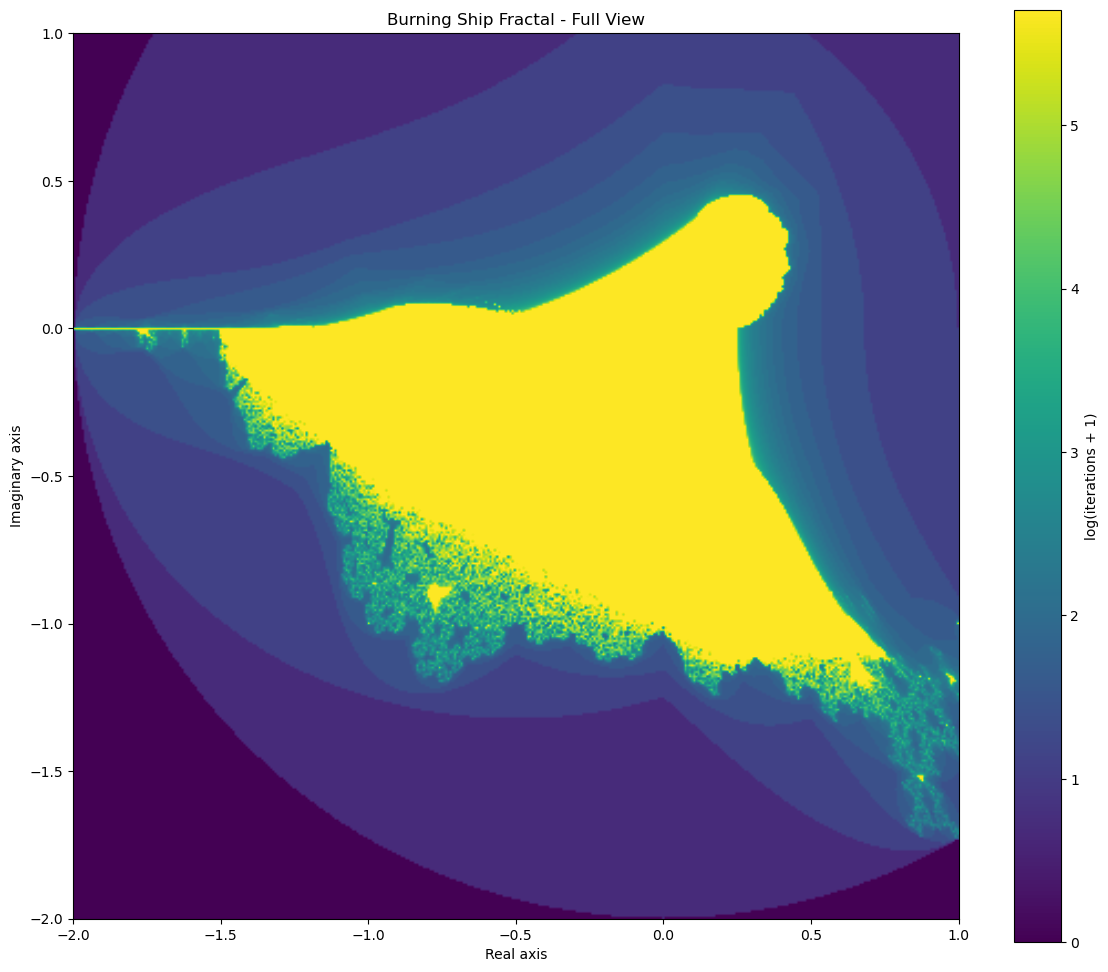

In [16]:
def plot_burning_ship(fractal, xmin, xmax, ymin, ymax, title="Burning Ship Fractal"):
    """
    Create a nice visualization of the fractal.
    """
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Use a logarithmic scale to see more detail
    # Add 1 to avoid log(0)
    fractal_log = np.log(fractal + 1)
    
    # Create the image
    im = ax.imshow(
        fractal_log,
        extent=[xmin, xmax, ymin, ymax],
        cmap='viridis',
        origin='lower',
        interpolation='bilinear'
    )
    
    ax.set_xlabel('Real axis')
    ax.set_ylabel('Imaginary axis')
    ax.set_title(title)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('log(iterations + 1)')
    
    plt.tight_layout()
    plt.show()

# Plot the fractal
plot_burning_ship(fractal_image, -2.0, 1.0, -2.0, 1.0, 
                  "Burning Ship Fractal - Full View")

## Step 5: Exploring Interesting Regions

The Burning Ship has many fascinating details. Let's zoom into the "ship" itself:

Generating ship detail...


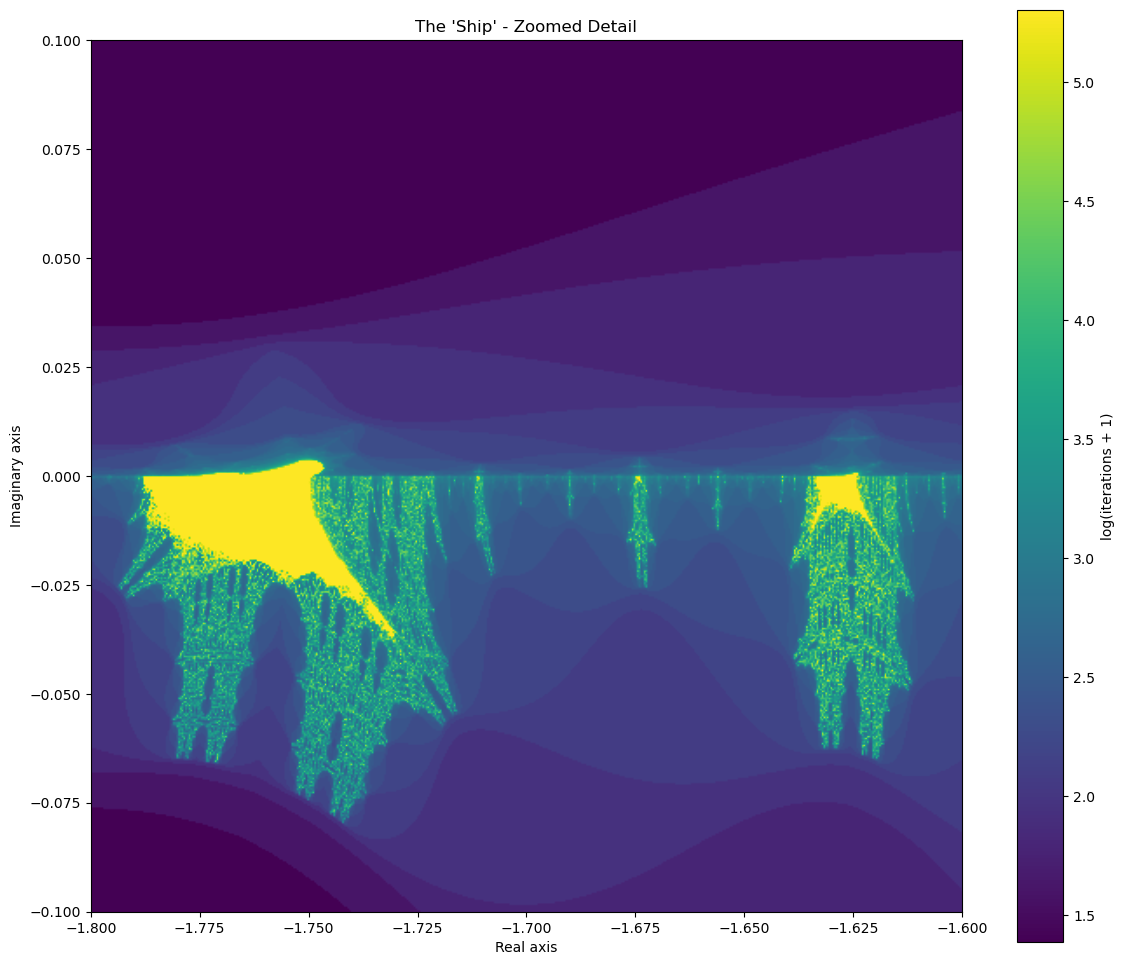

In [17]:
# The "ship" detail - zoom into the main structure
print("Generating ship detail...")
ship_detail = generate_burning_ship(
    xmin=-1.8, xmax=-1.6,
    ymin=-0.1, ymax=0.1,
    width=500, height=500,
    max_iterations=200
)

plot_burning_ship(ship_detail, -1.8, -1.6, -0.1, 0.1,
                  "The 'Ship' - Zoomed Detail")

## Step 6: Understanding the Absolute Value Effect

Let's visualize why the absolute value matters by comparing iterations with and without it:

Generating comparison images...


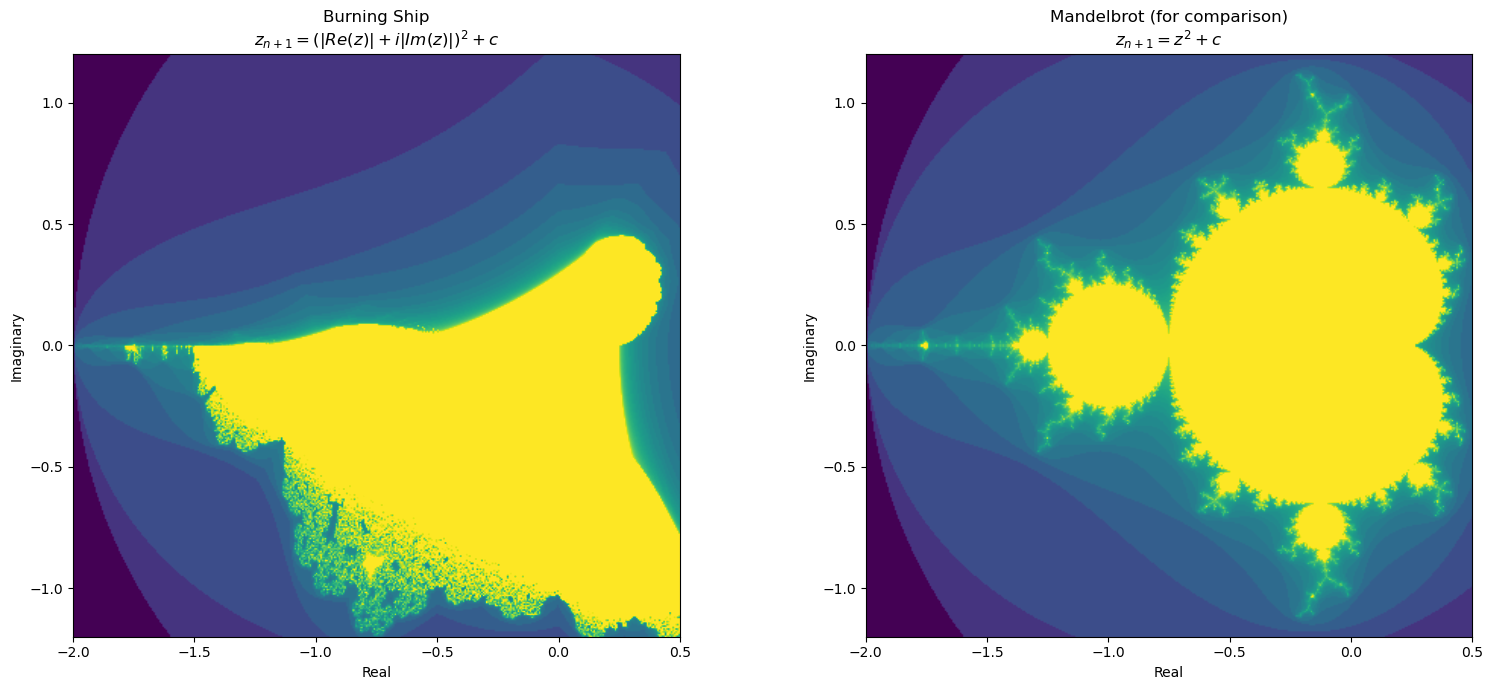

Notice how the Burning Ship appears 'flipped' compared to Mandelbrot!


In [15]:
def mandelbrot_iteration(c, max_iterations=100):
    """Standard Mandelbrot for comparison (no absolute values)."""
    z = 0 + 0j
    for iteration in range(max_iterations):
        z = z**2 + c  # No absolute value!
        if abs(z) > 2.0:
            return iteration
    return max_iterations

# Compare the two formulas side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Generate both fractals for the same region
print("Generating comparison images...")
width, height = 400, 400
xmin, xmax = -2.0, 0.5
ymin, ymax = -1.2, 1.2

x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)

burning_ship = np.zeros((height, width))
mandelbrot = np.zeros((height, width))

for i, y_val in enumerate(y):
    for j, x_val in enumerate(x):
        c = x_val + 1j * y_val
        burning_ship[i, j] = burning_ship_iteration(c, 100)
        mandelbrot[i, j] = mandelbrot_iteration(c, 100)

# Plot Burning Ship
im1 = ax1.imshow(np.log(burning_ship + 1), extent=[xmin, xmax, ymin, ymax],
                 cmap='viridis', origin='lower', interpolation='bilinear')
ax1.set_title('Burning Ship\n$z_{n+1} = (|Re(z)| + i|Im(z)|)^2 + c$')
ax1.set_xlabel('Real')
ax1.set_ylabel('Imaginary')

# Plot Mandelbrot
im2 = ax2.imshow(np.log(mandelbrot + 1), extent=[xmin, xmax, ymin, ymax],
                 cmap='viridis', origin='lower', interpolation='bilinear')
ax2.set_title('Mandelbrot (for comparison)\n$z_{n+1} = z^2 + c$')
ax2.set_xlabel('Real')
ax2.set_ylabel('Imaginary')


plt.tight_layout()
plt.show()

print("Notice how the Burning Ship appears 'flipped' compared to Mandelbrot!")

## Exploration Ideas

Now that you understand the basics, try:

1. **Different color schemes**: Change the `cmap` parameter (try 'twilight', 'viridis', 'plasma')
2. **Higher iterations**: Increase `max_iterations` to see more detail (but slower computation)
3. **Zoom into different areas**: Modify the `xmin, xmax, ymin, ymax` parameters
4. **Smooth coloring**: Use the continuous iteration count method for smoother gradients
5. **Different escape radius**: Try values other than 2.0

Interesting coordinates to explore:
- The main ship: `x=[-1.8, -1.6], y=[-0.1, 0.1]`
- Antenna detail: `x=[-1.755, -1.745], y=[0.02, 0.03]`
- Deep zoom: `x=[-1.75, -1.74], y=[0.025, 0.035]`